In [13]:
%matplotlib inline
import pandas as pd
import pylab
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

import random
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial.distance as ssd
from sklearn.ensemble import RandomForestClassifier
import sklearn

In [3]:
obs = pd.read_csv('C:/Users/Max/Downloads/data/training_set.csv')
meta = pd.read_csv('C:/Users/Max/Downloads/data/training_set_metadata.csv')

In [4]:
def timeplot(band,id):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(obs.mjd[(obs.passband==band)&(obs.object_id==id)],obs.flux[(obs.passband==band)&(obs.object_id==id)])

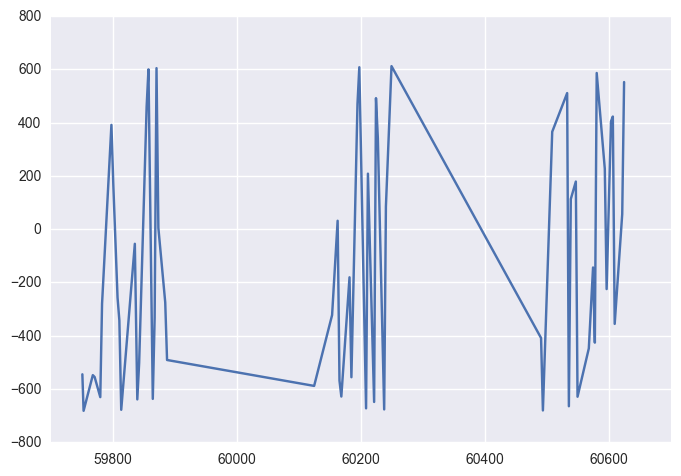

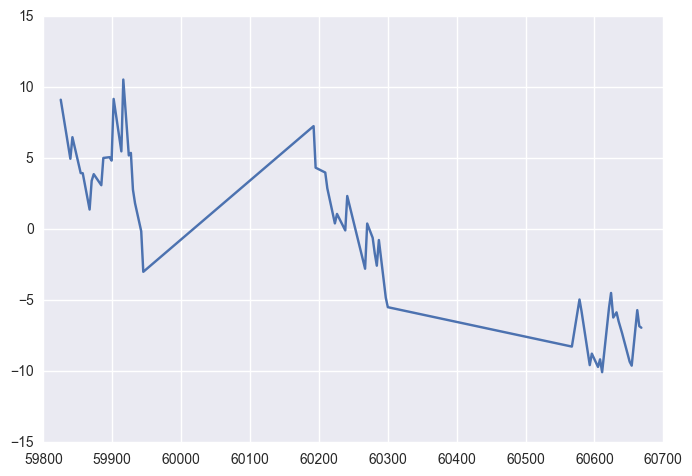

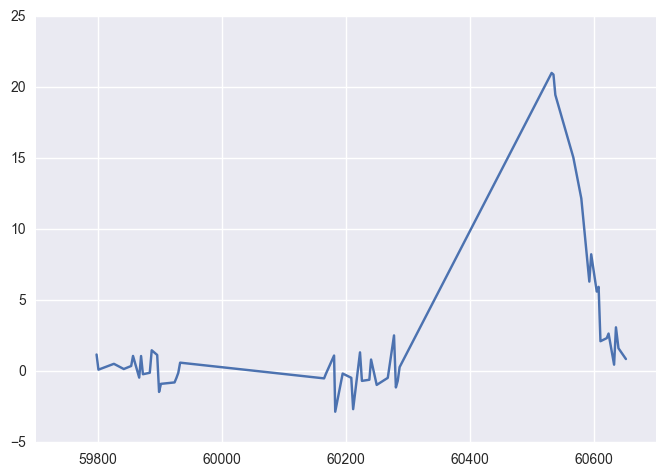

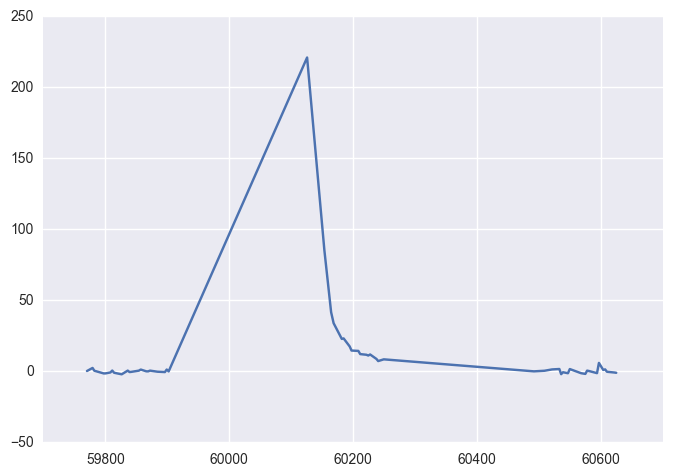

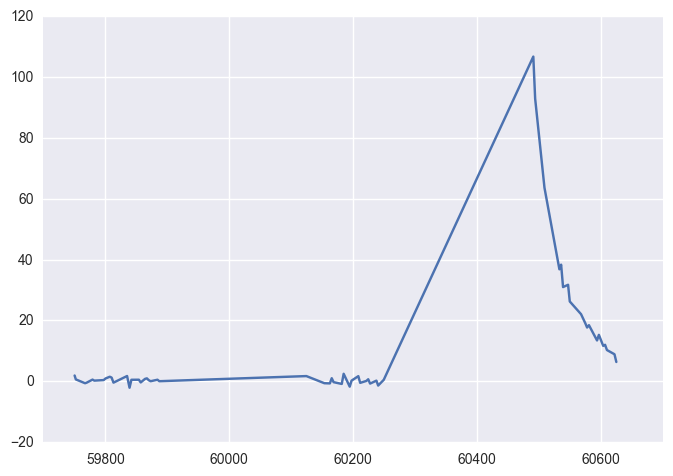

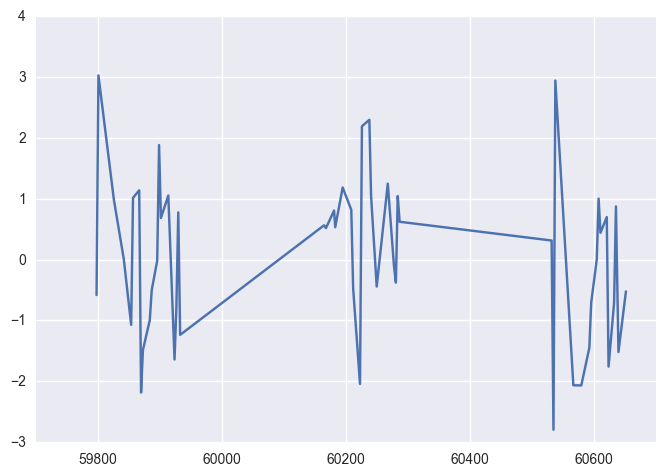

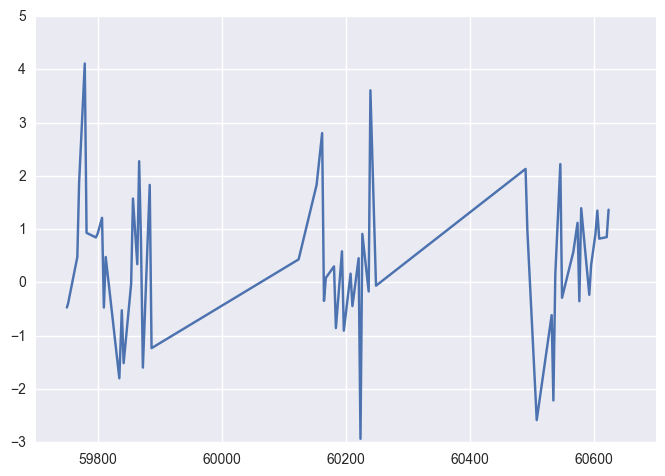

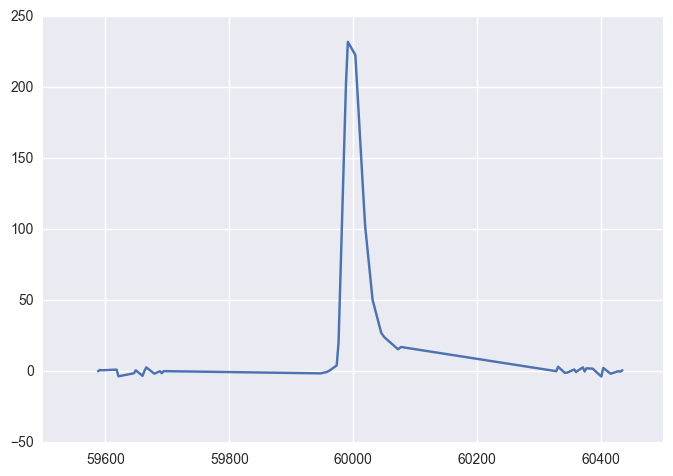

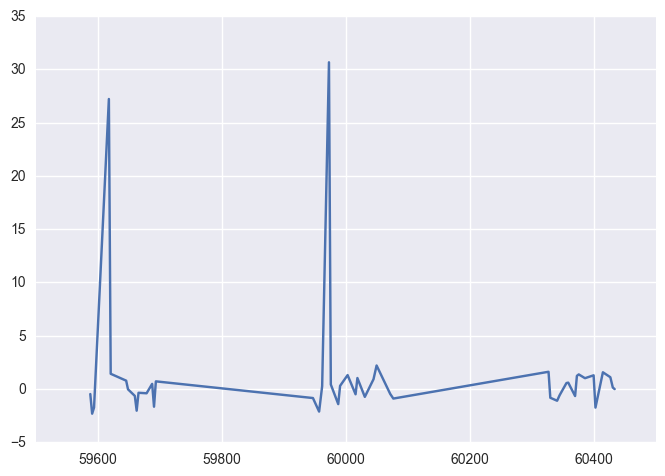

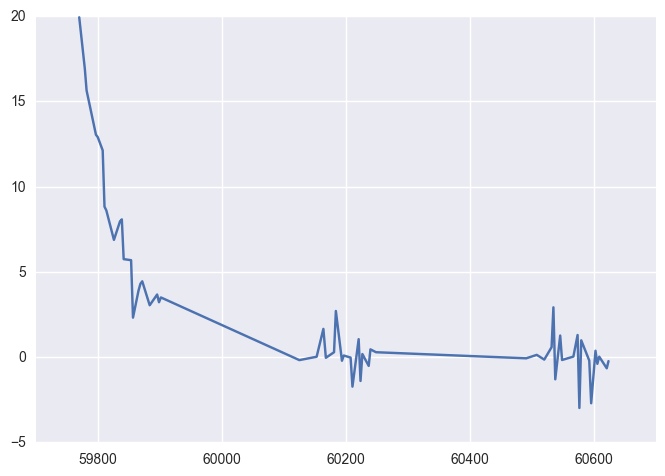

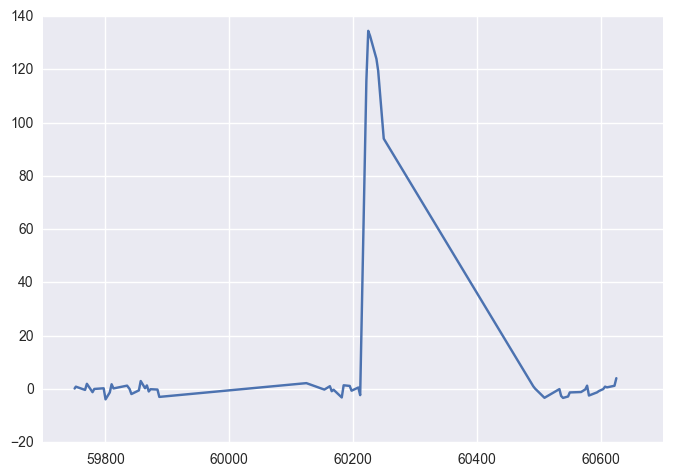

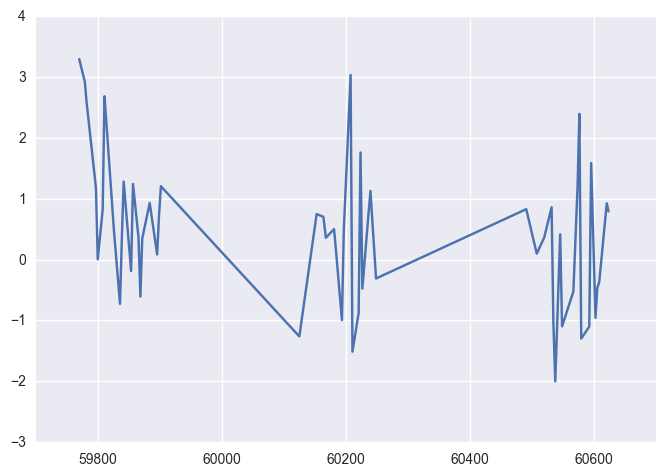

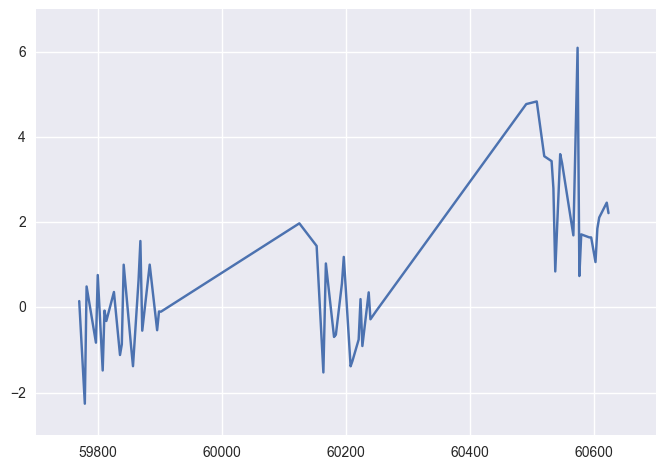

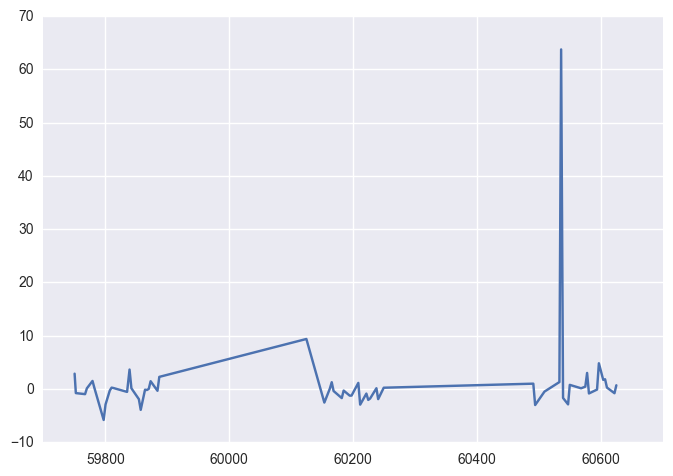

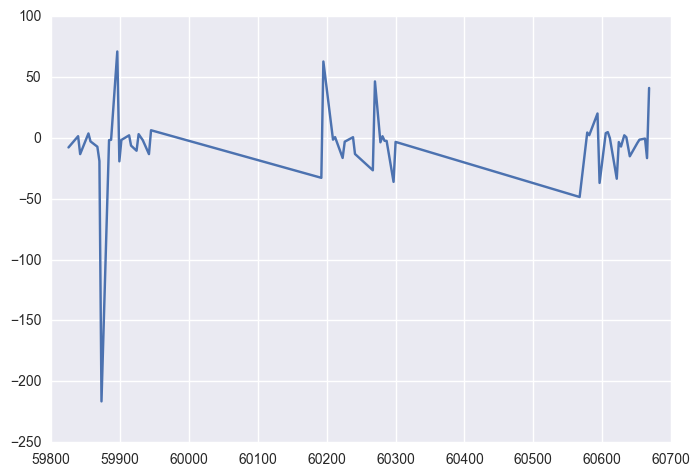

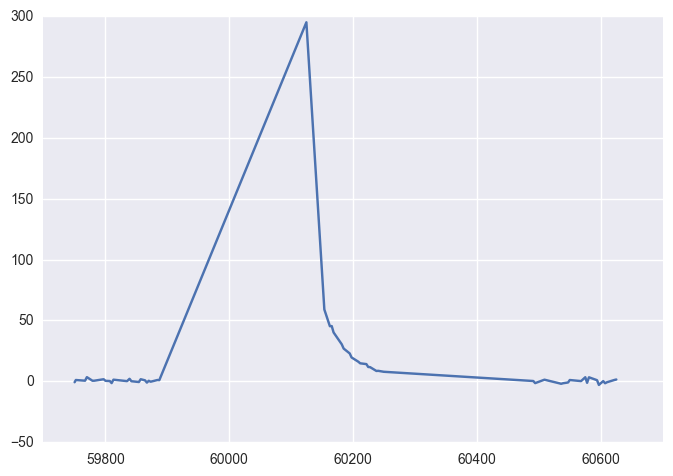

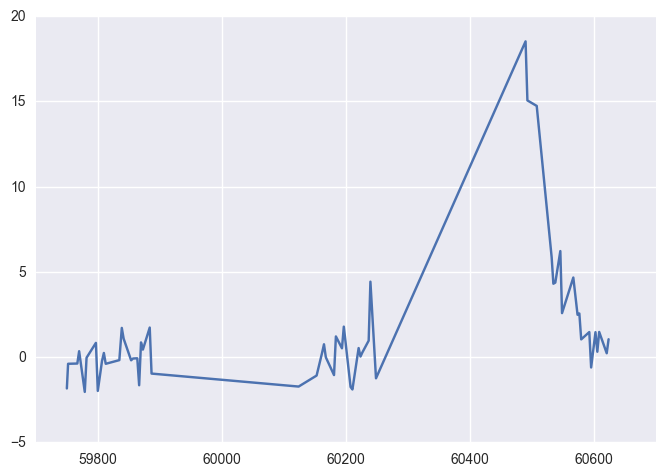

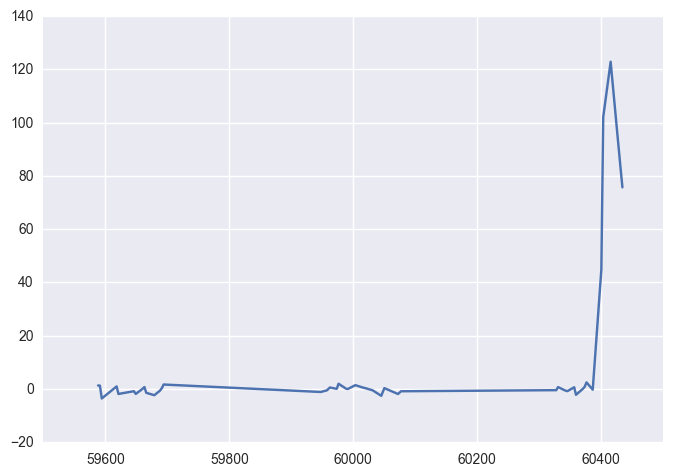

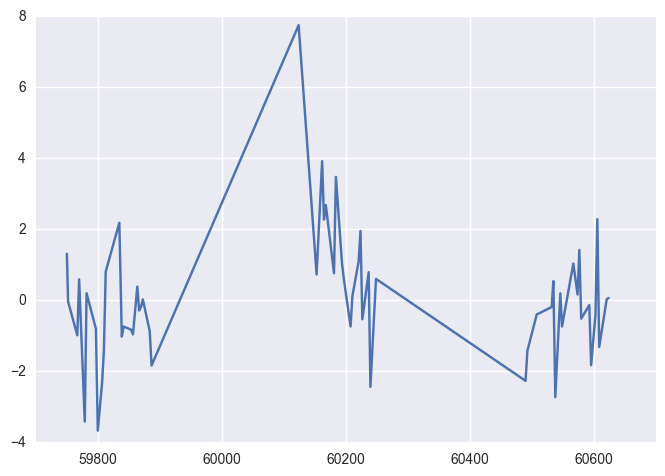

In [5]:
for i in range(20):
    timeplot(2,obs.object_id.unique()[i])

In [6]:
       """     x=obs.mjd[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[5])]
            y=obs.mjd[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[1])]
            distance, path = fastdtw(x, y, dist=euclidean)
            dist_m[i][j]=distance
            print(distance)
dist_m[5][1]"""

'     x=obs.mjd[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[5])]\n     y=obs.mjd[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[1])]\n     distance, path = fastdtw(x, y, dist=euclidean)\n     dist_m[i][j]=distance\n     print(distance)\ndist_m[5][1]'

In [7]:
def dtw_m(num):
    dist_m=np.zeros((num,num))
    for i in range(num):
        x=obs.flux[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[i])]
        for j in range(num):
            if i!=j:
                y=obs.flux[(obs.passband==2)&(obs.object_id==obs.object_id.unique()[j])]
                distance, path = fastdtw(x, y, dist=euclidean)
                dist_m[i][j]=distance
    return dist_m
            


In [9]:
from time import time
t0 = time()
dist_m=dtw_m(20)    
distArray = ssd.squareform(dist_m)

z=linkage(distArray)
labels = sci.cluster.hierarchy.fcluster(z, 3, criterion='maxclust')

t1 = time()
print('function vers1 takes %f' %(t1-t0))

function vers1 takes 31.782825


In [10]:
meta.target.unique()

array([92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53], dtype=int64)

In [32]:
t0 = time()
test=meta.object_id.sample(n=200)
obs_test=obs[obs.object_id.isin(list(test))]
meta_test=meta[meta.object_id.isin(list(test))]
full_test=obs_test.merge(meta_test,on="object_id")
full_x=full_test.drop(["target","distmod"],axis=1)
full_y=full_test["target"]

train_index=meta.object_id.sample(n=100)
obs_train=obs[obs.object_id.isin(list(train_index))]
meta_train=meta[meta.object_id.isin(list(train_index))]
full_train=obs_train.merge(meta_train,on="object_id")
full_x_train=full_train.drop(["target","distmod"],axis=1)
full_y_train=full_train["target"]

clf=RandomForestClassifier(n_estimators=80 ,min_samples_leaf=22)

clf.fit(full_x,full_y)
pred=clf.predict_proba(full_x)


t1 = time()
print('function vers1 takes %f' %(t1-t0))

function vers1 takes 3.859568


In [38]:
dataset = pd.DataFrame({'object_id':full_x.object_id,
                        'Class_6':pred[:,0],
                        'Class_15':pred[:,1],
                        'Class_16':pred[:,2],
                        'Class_42':pred[:,3],
                        'Class_52':pred[:,4],
                        'Class_62':pred[:,5],
                        'Class_64':pred[:,6],
                        'Class_65':pred[:,7],
                        'Class_67':pred[:,8],
                        'Class_88':pred[:,9],
                        'Class_90':pred[:,10],
                        'Class_92':pred[:,11],
                        'Class_95':pred[:,12],                        
                       })
dataset['class_99']=0


In [46]:
output=pd.DataFrame({'object_id':meta.object_id})
output['class_6']=0
output['class_15']=0
output['class_16']=0
output['class_42']=0
output['class_52']=0
output['class_62']=0
output['class_64']=0
output['class_65']=0
output['class_67']=0
output['class_88']=0
output['class_90']=0
output['class_92']=0
output['class_95']=0


In [23]:
from sklearn.model_selection import KFold
df2 = pd.DataFrame(np.zeros((10,10)) )  
t0 = time()
test=meta.object_id.sample(n=150)
obs_test=obs[obs.object_id.isin(list(test))]
meta_test=meta[meta.object_id.isin(list(test))]
full_test=obs_test.merge(meta_test,on="object_id")
full_x=full_test.drop(["target","distmod"],axis=1)
full_y=full_test["target"]
for i in range(1):
    for k in range(10):
        result=0
        
        
        kf = KFold(n_splits=6)
        for train_index, test_index in kf.split(full_x):
           
            x_train, x_test = full_x.iloc[train_index], full_x.iloc[test_index]
            y_train, y_test = full_y.iloc[train_index], full_y.iloc[test_index]
           

            clf = RandomForestClassifier(n_estimators=60 ,min_samples_leaf=(k*5)+1)
            
            
            clf.fit(x_train,y_train)
            
            #ans=clf.predict(x_test)
            
            result+=clf.score(x_test,y_test)
            #print(sklearn.metrics.r2_score(y_test,ans))
            #print(neigh.score(X_test,y_test),"  ",end="")
        # print("pa",i)
        # print(k_val)
        #print(np.average(result))
        #print(result)
        df2.ix[i,k]=result/(6)
    
    print("BREAK")
print(df2)

t1 = time()
print('function vers1 takes %f' %(t1-t0))

BREAK
          0         1         2         3         4         5         6  \
0  0.488869  0.537524  0.517816  0.479824  0.536829  0.539069  0.512789   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9  
0  0.534624  0.535709  0.514569  
1  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000 

In [28]:
from sklearn.model_selection import KFold
df2 = pd.DataFrame(np.zeros((10,10)) )  
t0 = time()

for i in range(1):
    for k in range(10):
        result=0
        
        
        
        for j in range(6):
            test_index=meta.object_id.sample(n=300)
            train_index=meta.object_id.sample(n=100)
            
            obs_test=obs[obs.object_id.isin(list(test_index))]
            meta_test=meta[meta.object_id.isin(list(test_index))]
            full_test=obs_test.merge(meta_test,on="object_id")
            full_x=full_test.drop(["target","distmod"],axis=1)
            full_y=full_test["target"]
            
            obs_train=obs[obs.object_id.isin(list(train_index))]
            meta_train=meta[meta.object_id.isin(list(train_index))]
            full_train=obs_train.merge(meta_train,on="object_id")
            full_x_train=full_train.drop(["target","distmod"],axis=1)
            full_y_train=full_train["target"]
            clf = RandomForestClassifier(n_estimators=70 ,min_samples_leaf=(k*8)+1)
            
            
            clf.fit(full_x,full_y)
            
            #ans=clf.predict(x_test)
            
            result+=clf.score(full_x_train,full_y_train)
            #print(sklearn.metrics.r2_score(y_test,ans))
            #print(neigh.score(X_test,y_test),"  ",end="")
        # print("pa",i)
        # print(k_val)
        #print(np.average(result))
        #print(result)
        df2.ix[i,k]=result/(6)
    
    print("BREAK")
print(df2)

t1 = time()
print('function vers1 takes %f' %(t1-t0))

BREAK
          0         1         2         3         4         5        6  \
0  0.436799  0.468705  0.485592  0.501997  0.484681  0.501747  0.49296   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   

          7         8         9  
0  0.488743  0.455105  0.497969  
1  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000  
4  0.0000

In [20]:
train_index=meta.object_id.sample(n=100)

(4514,)